## A Complete EDA and Visualization of Text Data

Visually representing the content of a text document is one of the most important tasks in the field of text mining. As a data scientist or NLP specialist, not only we explore the content of documents from different aspects and at different levels of details, but also we summarize a single document, show the words and topics, detect events, and create storylines.

We will use Womens Clothing E-Commerce Reviews data set, and try to explore and visualize as much as we can, using Plotly’s Python graphing library and Bokeh visualization library. Not only we are going to explore text data, but also we will visualize numeric and categorical features.
Let’s get started!

## Dataset

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

* <b>Clothing ID:</b> Integer Categorical variable that refers to the specific piece being reviewed.
* <b>Age:</b> Positive Integer variable of the reviewers age.
* <b>Title:</b> String variable for the title of the review.
* <b>Review Text:</b> String variable for the review body.
* <b>Rating:</b> Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
* <b>Recommended IND:</b> Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
* <b>Positive Feedback Count:</b> Positive Integer documenting the number of other customers who found this review positive.
* <b>Division Name:</b> Categorical name of the product high level division.
* <b>Department Name:</b> Categorical name of the product department name.
* <b>Class Name:</b> Categorical name of the product class name.

## Import required modules

Import the libraries

In [3]:
!pip install textblob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


Read data from csv file

In [4]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Let's remove null values and unnecessary columns

Calculates the number of null values in each column of a pandas DataFrame

In [5]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

Removes two specific columns from a pandas DataFrame, drops any rows that contain null values, and computes the sum of null values for each column in the resulting DataFrame

In [6]:
df.drop(['Unnamed: 0', 'Title'], axis=1, inplace=True)
df.dropna(inplace=True)
df.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

## Preprocess the data

The "preprocess" function replaces certain characters and strings in the "ReviewText" input and returns the modified text. It is then applied to the "Review Text" column in a pandas dataframe called "df".

In [7]:
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')  
    return ReviewText

df['Review Text'] = preprocess(df['Review Text'])

Using [TextBlob](https://textblob.readthedocs.io/en/dev/) to calculate sentiment polarity which lies in the range of [-1,1] where 1 means positive sentiment and -1 means a negative sentiment.

and also calculating word counts and review length. 

This code is adding three new columns 'Polarity', 'word_count', and 'review_len' to the dataframe 'df'. The 'Polarity' column is calculated by applying TextBlob's sentiment analysis to each row of the 'Review Text' column, which returns a polarity score. The 'word_count' column is calculated by counting the number of words in each row of the 'Review Text' column using the 'split' function. The 'review_len' column is calculated by counting the total length of characters in each row of the 'Review Text' column using the 'len' function.






In [8]:
df['Polarity'] = df['Review Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['Review Text'].apply(lambda x: len(str(x)))

In [9]:
df

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity,word_count,review_len
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0.633333,8,53
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0.339583,62,303
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,0.073675,98,500
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,0.550000,22,124
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,0.512891,36,192
...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,0.552667,28,131
23482,862,48,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,0.091667,38,223
23483,1104,31,"This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,0.414286,42,208
23484,1084,28,I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,0.322222,86,427


## Let's check most Postive, Neutral and Negative polarity reviews

### Polarity == 1

This code selects a random sample of 5 rows from the "Review Text" column of a pandas dataframe called "df" where the "Polarity" column equals 1. It then iterates through each row in the sample and prints the first element (i.e. the text review) to the console.

In [11]:
cl = df.loc[df.Polarity == 1, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])
    print("**************************************************")

Great style!
**************************************************
Made my wedding outfit perfect!
**************************************************
Fits perfect.
**************************************************
Perfect way to add warmth in transition weather
**************************************************
Perfect for lunch with the girls, pta, or saturdays with the family. this skirt is a perfect addition to your fall wardrobe.
**************************************************


### Polarity == 0

This code selects a random sample of 5 rows from the "Review Text" column of a pandas dataframe called "df" where the "Polarity" column equals 0. It then iterates through each row in the sample and prints the first element (i.e. the text review) to the console.

In [12]:
cl = df.loc[df.Polarity == 0, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])
    print("**************************************************")

Had to take a needle and pull threads to the back so not visible and i see this as an ongoing problem.
**************************************************
I was looking for a velvet dress for the holidays. this one was beutiful in color and teksture.
the only problem was that it was snug in the shoulders. going a size up would have made it too roomy elswhere.
**************************************************
I tried on xs petites as someone had returned it . i didn't find that it ran small, it was ok on me. i am not sure if the regular size would work but i didn't end up purchasing this today as the color was jsut so-so on my skin tone.

likes: contrast and detail in ruffle, romantic

dislikes: the tag pulled on the fabric a bit and you could tell, so the fabric seemed fragile.
**************************************************
I look like a stuffed sausage in these pants and i even went up a size. for some reason, this fabric isn't working for me. i think it's the sheed combined with 

### Polarity <= -0.7

This code selects a random sample of 5 rows from the "Review Text" column of a pandas dataframe called "df" where the "Polarity" column is less than or equal to -0.7. It then iterates through each row in the sample and prints the first element (i.e. the text review) to the console.

In [13]:
cl = df.loc[df.Polarity <= -0.7, ['Review Text']].sample(5).values
for c in cl:
    print(c[0])
    print("**************************************************")

Cut out design, no seems or hems.
 very disappointed in retailer
**************************************************
What a disappointment and for the price, it's outrageous!
**************************************************
The button fell off when i took it out of the bag, and i noticed that all of the thread had unraveled. will be returning :-(
**************************************************
Received this product with a gaping hole in it. very disappointed in the quality and the quality control at the warehouse
**************************************************
Awful color, horribly wrinkled and just a mess...so disappointed
**************************************************


## Distribution of review sentiment polarity score

This code generates four histograms to visualize the distribution of four different features ('Polarity', 'Age', 'review_len', 'word_count') in a pandas dataframe called "df". Seaborn's "distplot" function is used to create the histograms, and Matplotlib is used to customize the titles and labels. The histograms are displayed one at a time using the "show" method.

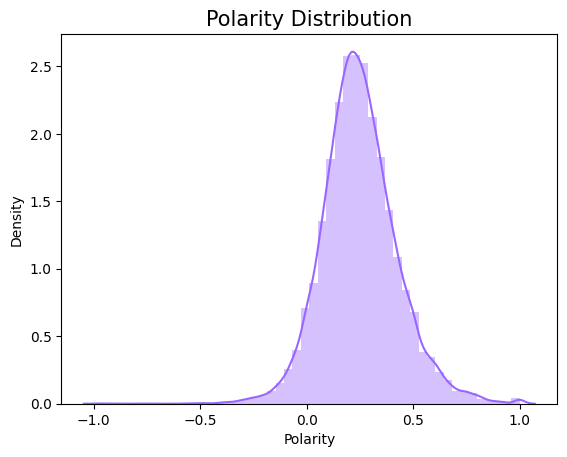

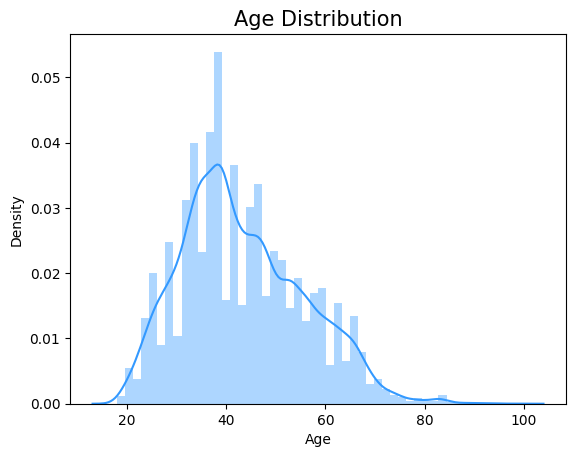

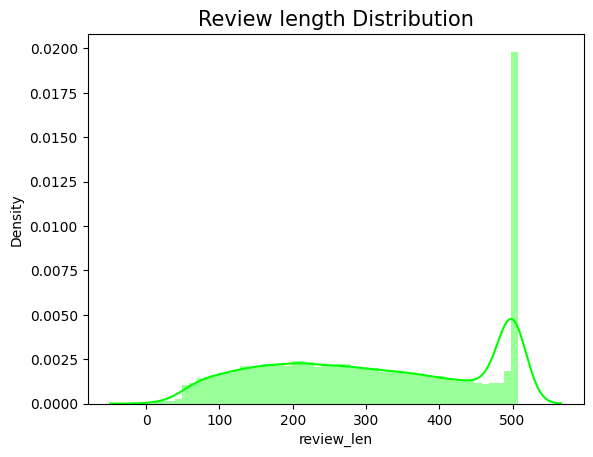

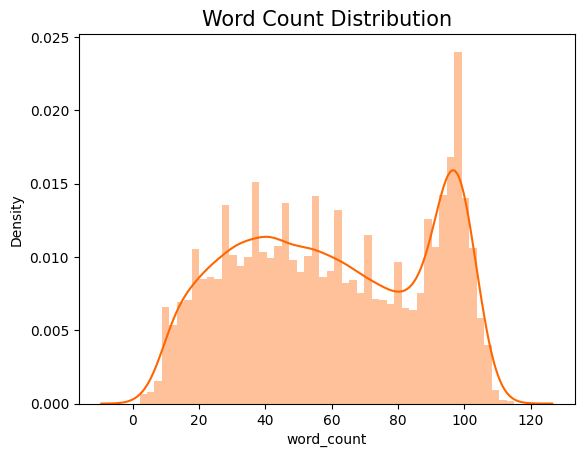

In [ ]:
features = ['Polarity', 'Age', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Age Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#3399ff', '#00ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors): 
    sns.distplot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

1. **Vast majority of the sentiment polarity scores are greater than zero, means most of them are pretty positive.**
2. **Most reviewers are in their 30s to 40s.**

## Distribution of review ratings

This code creates a bar chart using Seaborn and Matplotlib to visualize the distribution of ratings in a pandas dataframe called "df". The x-axis represents the rating values, while the y-axis represents the count of each rating value. The chart is displayed using the "show" method.

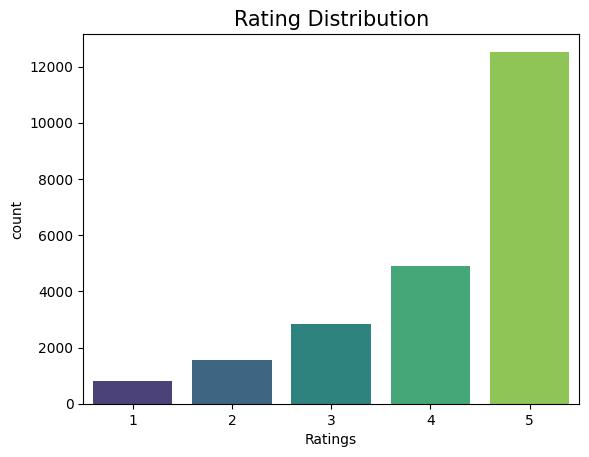

In [ ]:
sns.countplot(x = 'Rating', palette='viridis', data=df)
plt.title('Rating Distribution', size=15)
plt.xlabel('Ratings')
plt.show()

**The ratings are in align with the polarity score, that is, most of the ratings are pretty high at 4 or 5 ranges.**

## Distribution by Division Name

This code creates a bar chart using Seaborn and Matplotlib to visualize the distribution of division names in a pandas dataframe called "df". The x-axis represents the different division names, while the y-axis represents the count of each division name. The chart is displayed using the "show" method.

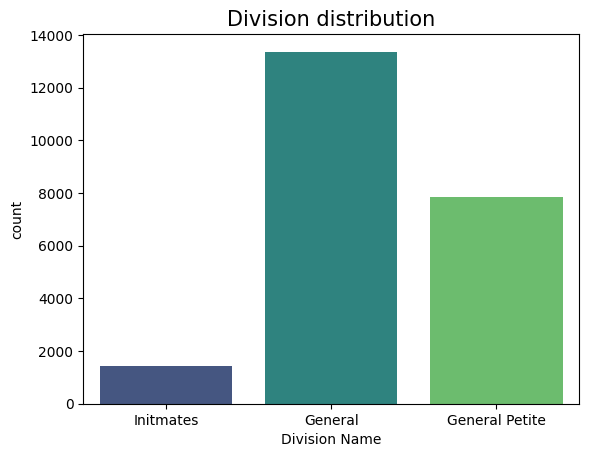

In [ ]:
sns.countplot(x='Division Name', palette='viridis', data=df)
plt.title('Division distribution', size=15)
plt.show()

**General division has the most number of reviews, and Initmates division has the least number of reviews.**

This code creates a bar chart using Seaborn and Matplotlib to visualize the distribution of department names in a pandas dataframe called "df". The x-axis represents the different department names, while the y-axis represents the count of each department name. The chart is displayed using the "show" method.



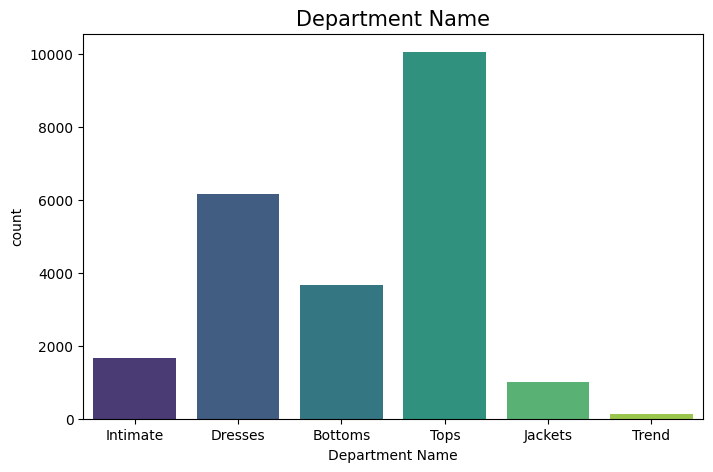

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Department Name', palette='viridis', data=df)
plt.title('Department Name', size=15)
plt.show()

## Distribution of Class

This code creates a horizontal bar chart using Seaborn and Matplotlib to visualize the distribution of different product classes in a pandas dataframe called "df". The y-axis represents the different class names, while the x-axis represents the count of each class name. The chart is displayed using the "show" method.



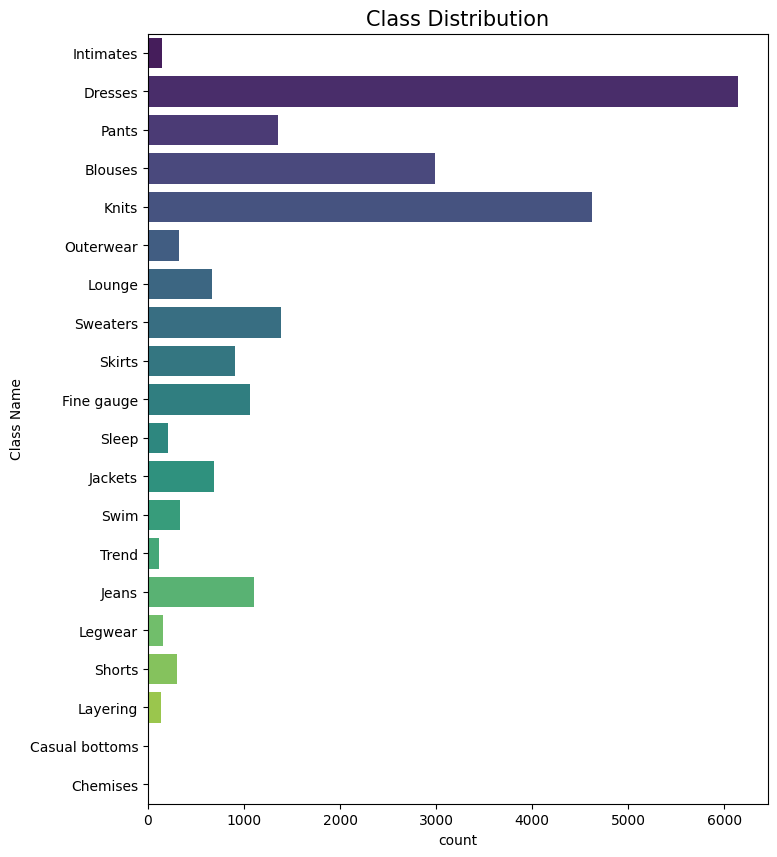

In [ ]:
plt.figure(figsize=(8, 10))
sns.countplot(y='Class Name', palette='viridis', data=df)
plt.title('Class Distribution', size=15)
plt.show()

## Unigrams, Bigrams and Trigrams

Now we come to “Review Text” feature, before explore this feature, we need to extract N-Gram features. N-grams are used to describe the number of words used as observation points, e.g., unigram means singly-worded, bigram means 2-worded phrase, and trigram means 3-worded phrase. In order to do this, we use scikit-learn’s [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) function.

First, it would be interesting to compare unigrams before and after removing stop words.

This is a Python function that returns the top n-grams (a sequence of n items) in a given text corpus. The function uses CountVectorizer from scikit-learn to tokenize and count the words in the corpus, and then returns a DataFrame with the n most common n-grams and their frequencies.

In [ ]:
def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df

This code calculates the top 20 most common unigrams (single words), bigrams (pairs of consecutive words), and trigrams (triplets of consecutive words) in the 'Review Text' column of a DataFrame named 'df'. The function 'get_top_ngrams' is called three times with different ngram ranges and 'stop_words' set to None. The resulting top n-grams are saved to the 'unigrams', 'bigrams', and 'trigrams' DataFrames.

In [ ]:
stop_words = None
n = 20
unigrams = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

This code calculates the top 20 most common unigrams (single words), bigrams (pairs of consecutive words), and trigrams (triplets of consecutive words) in the 'Review Text' column of a DataFrame named 'df'. The function 'get_top_ngrams' is called three times with different ngram ranges and 'stop_words' set to 'english'. The resulting top n-grams are saved to the 'unigrams', 'bigrams', and 'trigrams' DataFrames.

In [ ]:
stop_words = 'english'
n = 20
unigrams_st = get_top_ngrams(df['Review Text'], (1, 1), stop_words, n)
bigrams_st = get_top_ngrams(df['Review Text'], (2, 2), stop_words, n)
trigrams_st = get_top_ngrams(df['Review Text'], (3, 3), stop_words, n)

## Unigrams Distribution

This code creates a bar plot using seaborn library to display the top 20 unigrams before removing stopwords. The plot is sized at 8x10 and titled accordingly. The color used for the bars is defined by a variable 'colors'. The data used for the plot is sourced from the 'unigrams' dataframe. Finally, the plot is displayed using matplotlib library.

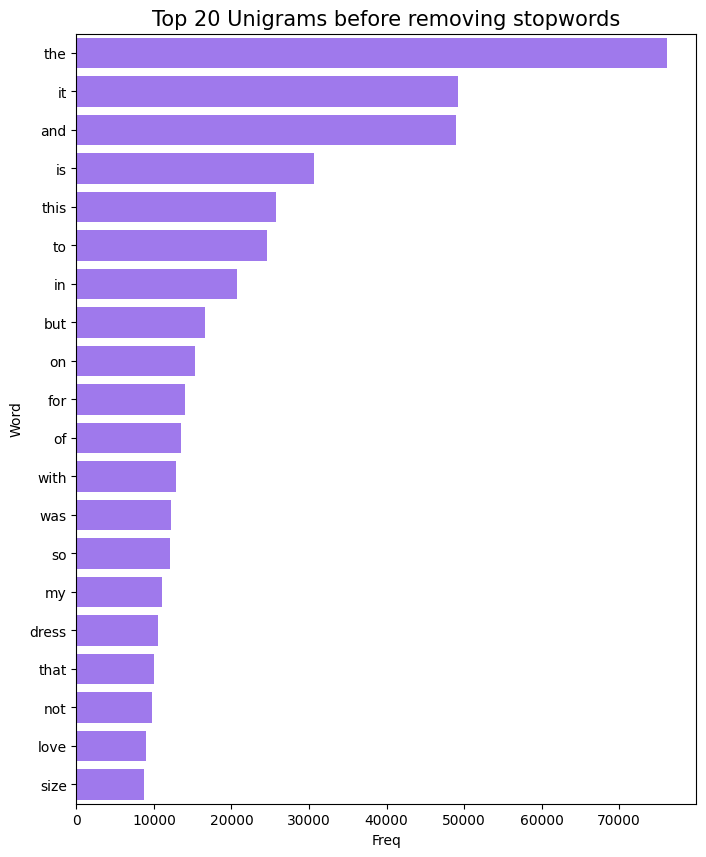

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams)
plt.title('Top 20 Unigrams before removing stopwords', size=15)
plt.show()

This code is similar to the previous one, but it creates a bar plot to display the top 20 unigrams after removing stopwords. The data used for the plot is sourced from the 'unigrams_st' dataframe, which is assumed to have been pre-processed to remove stopwords. The plot is titled accordingly and displayed using matplotlib library.

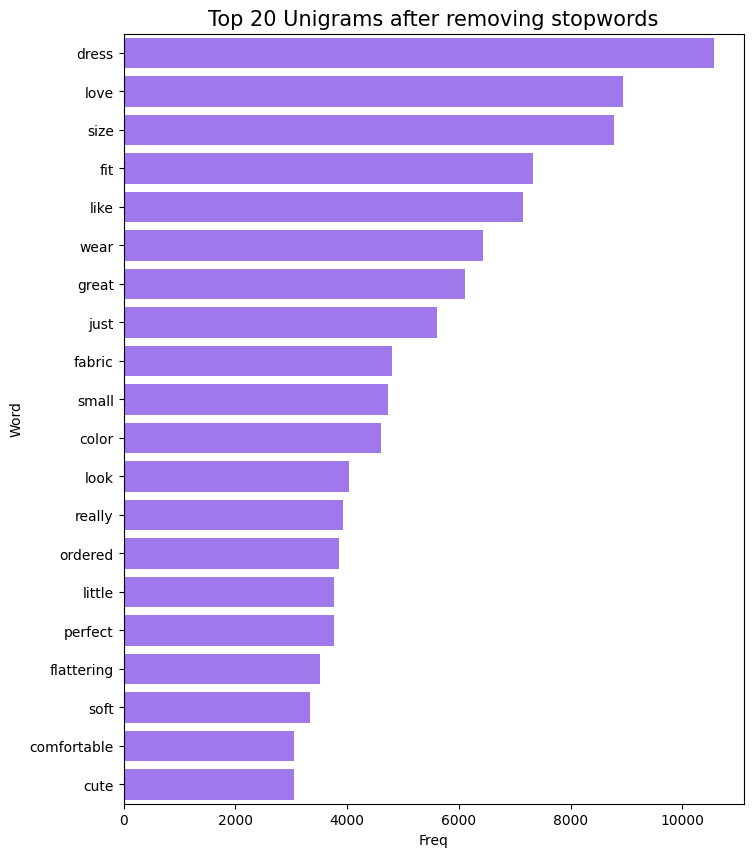

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[0], data=unigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Bigrams Distribution

This code creates a bar plot using seaborn library to display the top 20 bigrams before removing stopwords. The plot is sized at 8x10 and titled accordingly. The color used for the bars is defined by a variable 'colors[1]'. The data used for the plot is sourced from the 'bigrams' dataframe. Finally, the plot is displayed using matplotlib library.





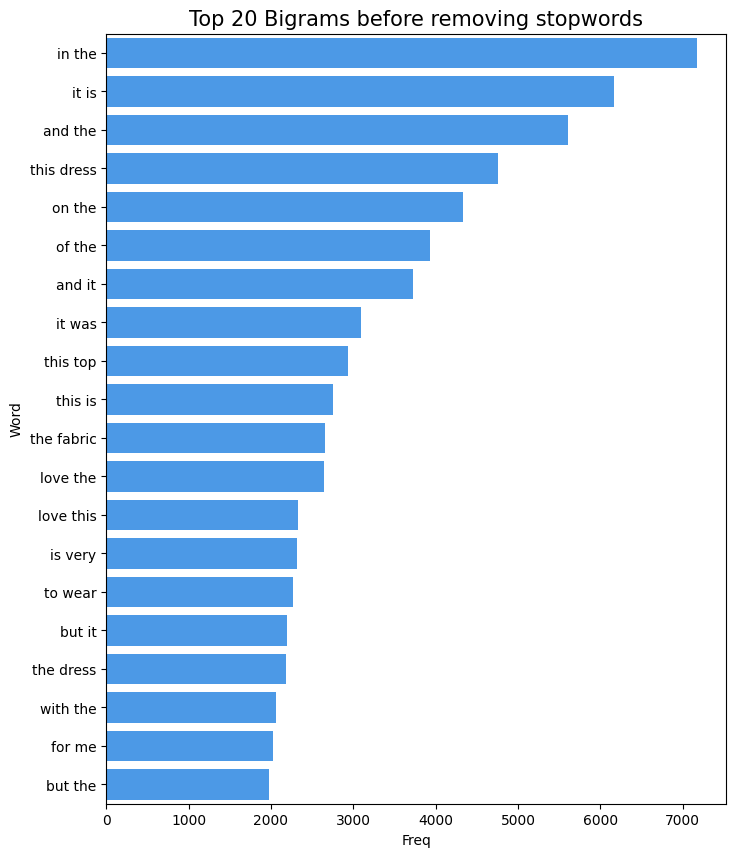

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams)
plt.title('Top 20 Bigrams before removing stopwords', size=15)
plt.show()

This code creates a bar plot using seaborn library to display the top 20 bigrams after removing stopwords. The plot is sized at 8x10 and titled accordingly. The color used for the bars is defined by a variable 'colors[1]'. The data used for the plot is sourced from the 'bigrams_st' dataframe, which is assumed to have been pre-processed to remove stopwords. Finally, the plot is displayed using matplotlib library.





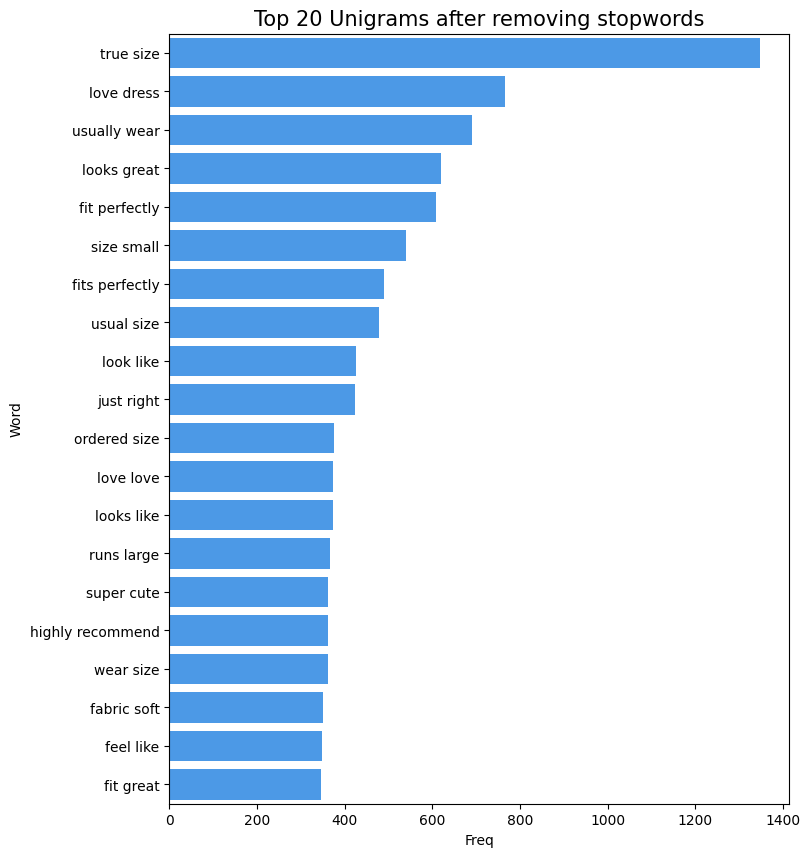

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[1], data=bigrams_st)
plt.title('Top 20 Unigrams after removing stopwords', size=15)
plt.show()

## Trigrams Distribution

This code creates a bar plot using seaborn library to display the top 20 trigrams before removing stopwords. The plot is sized at 8x10 and titled accordingly. The color used for the bars is defined by a variable 'colors[3]'. The data used for the plot is sourced from the 'trigrams' dataframe. Finally, the plot is displayed using matplotlib library.





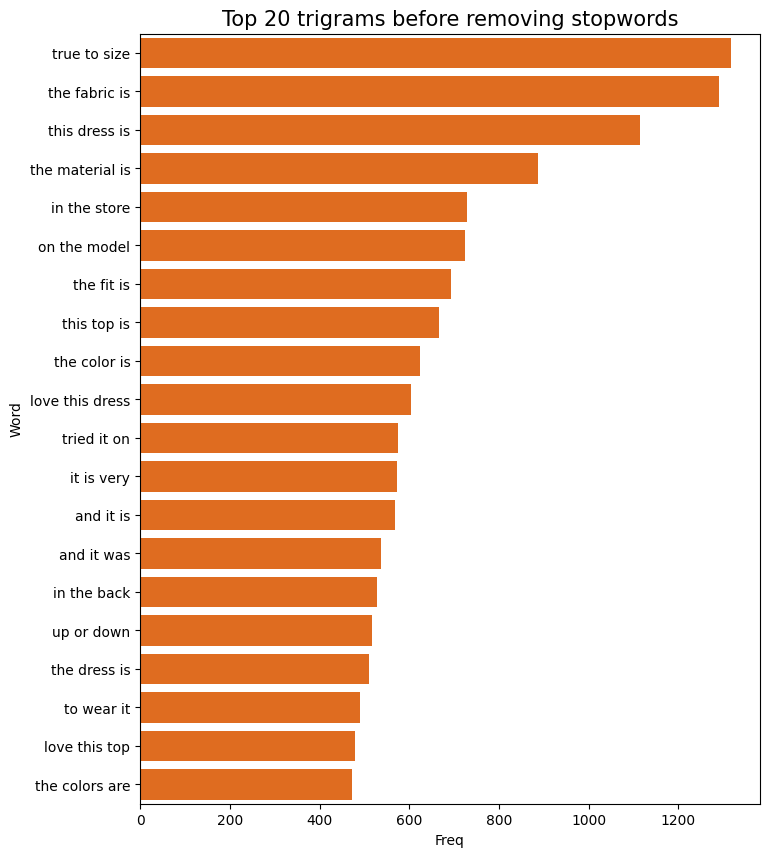

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams)
plt.title('Top 20 trigrams before removing stopwords', size=15)
plt.show()

This code creates a bar plot using seaborn library to display the top 20 trigrams after removing stopwords. The plot is sized at 8x10 and titled accordingly. The color used for the bars is defined by a variable 'colors[3]'. The data used for the plot is sourced from the 'trigrams_st' dataframe, which is assumed to have been pre-processed to remove stopwords. Finally, the plot is displayed using matplotlib library.





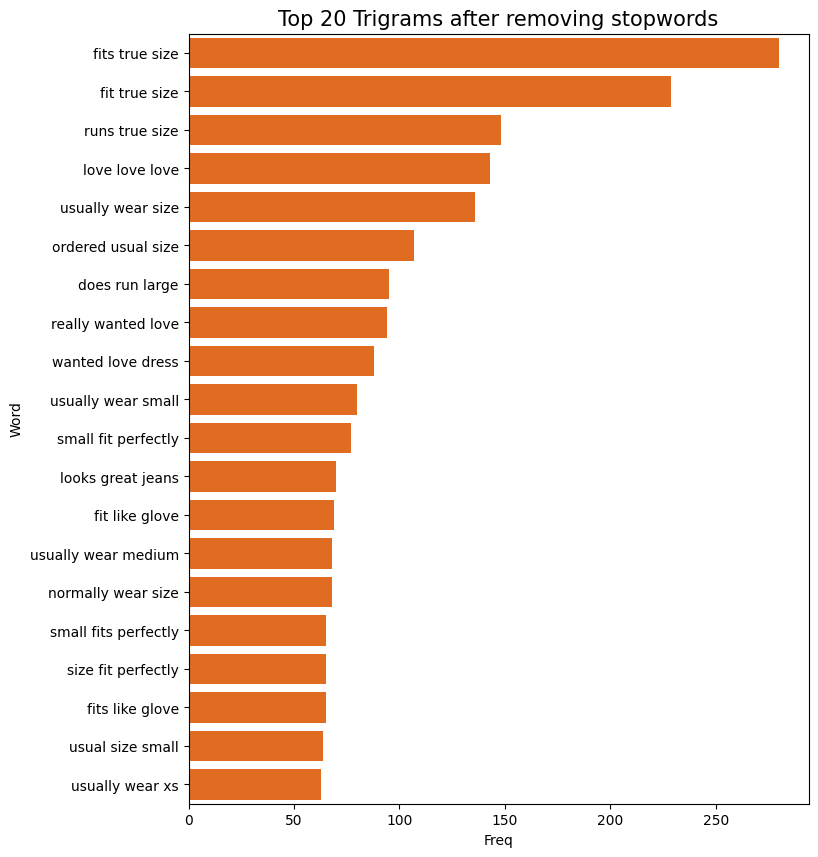

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(x='Freq', y='Word', color=colors[3], data=trigrams_st)
plt.title('Top 20 Trigrams after removing stopwords', size=15)
plt.show()

## Part-of-Speech Tagging (POS)

Part-Of-Speech Tagging (POS) is a process of assigning parts of speech to each word, such as noun, verb, adjective, etc


This code downloads the necessary NLTK resources for tokenization and part-of-speech tagging. Specifically, it downloads the 'punkt' tokenizer and the 'averaged_perceptron_tagger' tagger. Once downloaded, these resources can be used for various natural language processing tasks such as text classification, named entity recognition, and more.





In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

This code extracts the part-of-speech (POS) tags for each word in the 'Review Text' column of a Pandas DataFrame 'df'. It does so by first converting the column to a string using 'str()', then creating a TextBlob object using the string. Next, it creates a DataFrame 'pos_df' that contains two columns: 'word' and 'pos', where 'pos' contains the POS tag for each 'word'. Finally, it creates a new DataFrame 'top_pos' that contains the counts of each POS tag in the 'pos' column using the 'value_counts()' method.





In [ ]:
blob = TextBlob(str(df['Review Text']))
pos_df = pd.DataFrame(blob.tags, columns=['word', 'pos'])
#top_pos = pd.DataFrame(pos_df['pos'].value_counts(), columns=['pos', 'count'])
top_pos = pos_df['pos'].value_counts()

This code generates a horizontal bar plot using seaborn to display the counts of each part-of-speech tag in the 'Review Text' column of a DataFrame. The plot is titled and displayed using matplotlib.





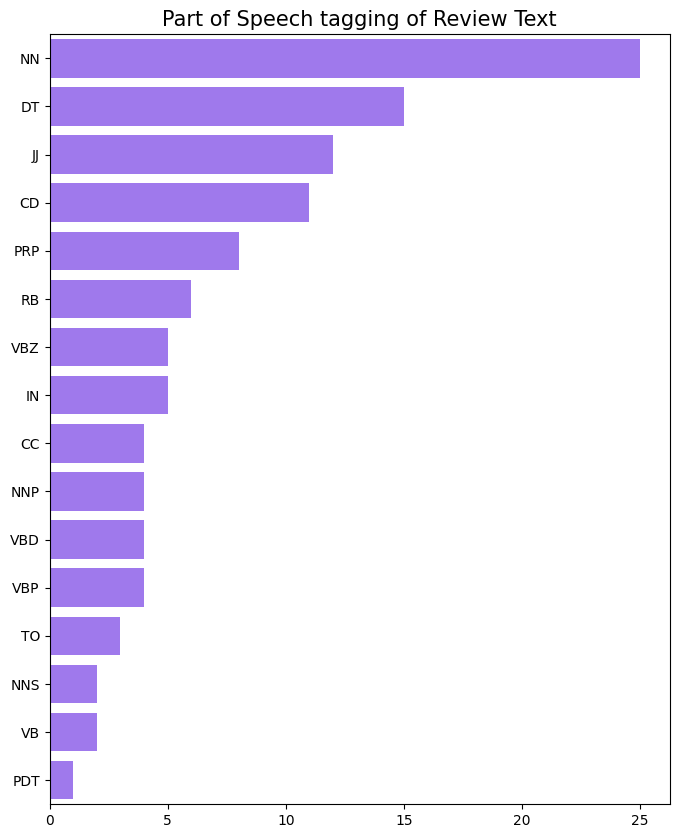

In [ ]:
plt.figure(figsize=(8, 10))
sns.barplot(y=top_pos.index, x=top_pos.values, color=colors[0])
plt.title('Part of Speech tagging of Review Text', size=15)
plt.show()

## Department name v/s Sentiment Polarity

This code creates a box plot using seaborn library to display the distribution of sentiment polarity scores for each department in the input DataFrame 'df'. The plot is sized at 10x6 and titled accordingly. The x-axis represents the different department names and the y-axis represents the sentiment polarity scores. The width of each box is set to 0.5 and the color palette is defined by 'viridis'. Finally, the plot is displayed using matplotlib library.





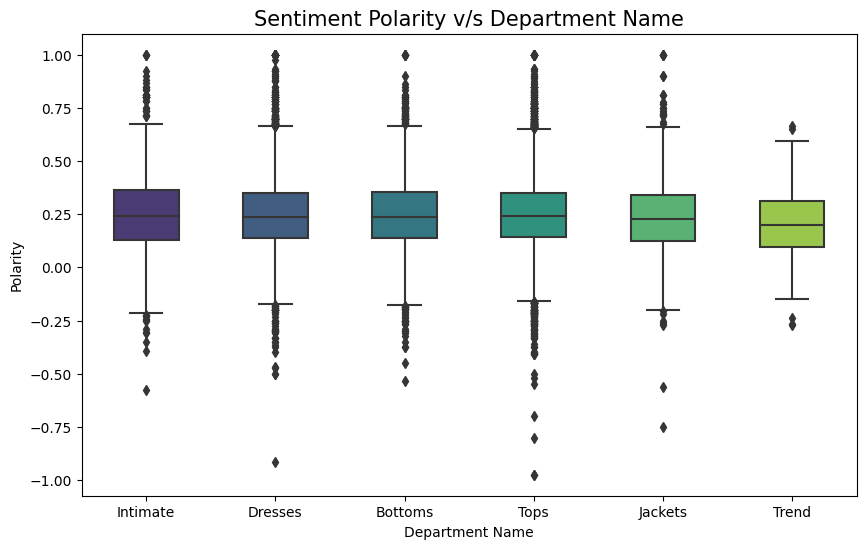

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Polarity', width=0.5, palette='viridis', data=df)
plt.title('Sentiment Polarity v/s Department Name', size=15)
plt.show()

The highest sentiment polarity score was achieved by all of the six departments except Trend department, and the lowest sentiment polarity score was collected by Tops department. And the Trend department has the lowest median polarity score. If you remember, the Trend department has the least number of reviews. This explains why it does not have as wide variety of score distribution as the other departments.

## Departments Name v/s Rating

This code creates a box plot using seaborn library to display the distribution of ratings for each department in the input DataFrame 'df'. The plot is sized at 10x6 and titled accordingly. The x-axis represents the different department names and the y-axis represents the rating scores. The width of each box is set to 0.5 and the color palette is defined by 'viridis'. Finally, the plot is displayed using matplotlib library.





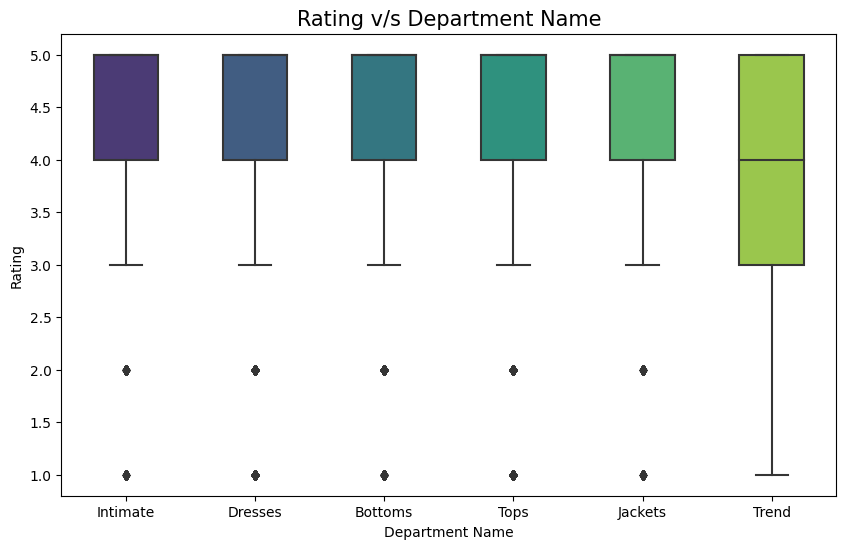

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='Rating', width=0.5, palette='viridis', data=df)
plt.title('Rating v/s Department Name', size=15)
plt.show()

Except Trend department, all the other departments’ median rating were 5. Overall, the ratings are high and sentiment are positive in this review data set.

This code generates a boxplot using Seaborn library to compare the length of reviews among different departments in a dataset. The plot is then displayed with a title.






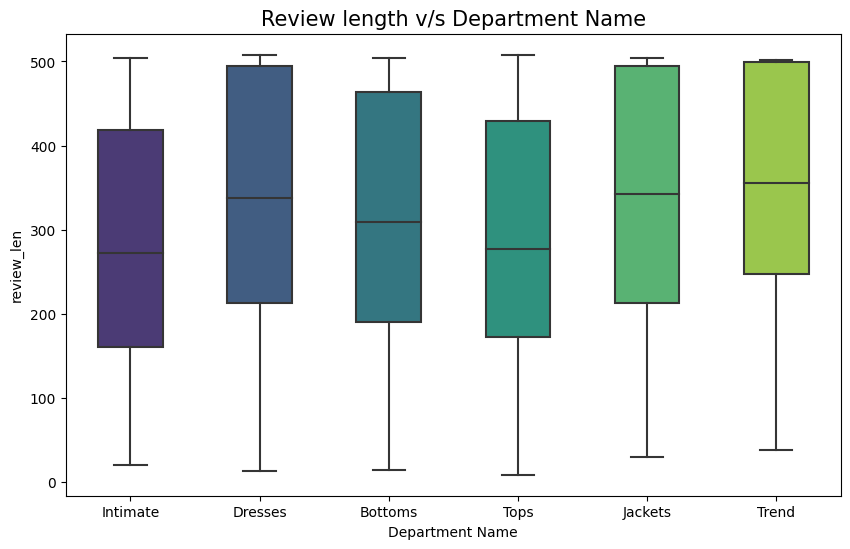

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department Name', y='review_len', width=0.5, palette='viridis', data=df)
plt.title('Review length v/s Department Name', size=15)
plt.show()

The median review length of Tops & Intimate departments are relative lower than those of the other departments.

## Distribution of Sentiment polarity of reviews based on Recommendation

This code generates a histogram using Seaborn library to compare the distribution of sentiment polarity scores among recommended and not recommended reviews in a dataset. The plot is then displayed with a title and a legend.






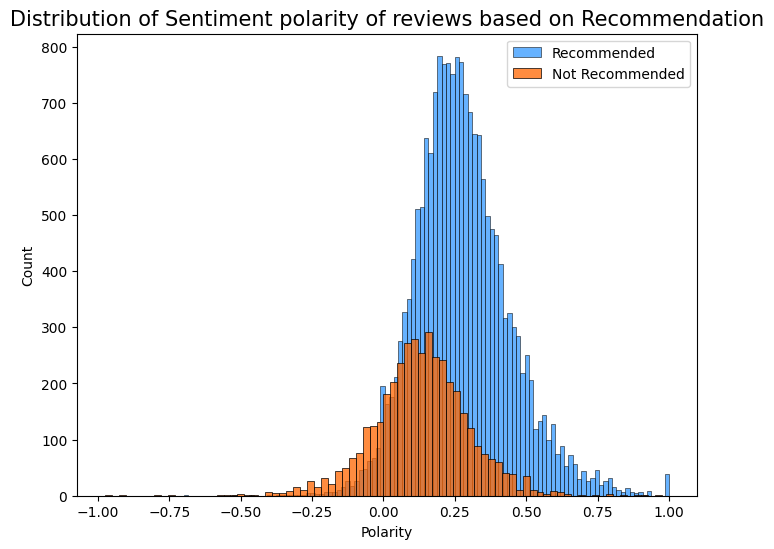

In [ ]:
recommended = df.loc[df['Recommended IND'] == 1, 'Polarity']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Polarity']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], label='Recommended')
sns.histplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Sentiment polarity of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

**It is obvious that reviews have higher polarity score are more likely to be recommended.**

## Distribution of Rating of reviews based on Recommendation

This code generates a density plot using Seaborn library to compare the distribution of rating scores among recommended and not recommended reviews in a dataset. The plot is then displayed with a title and a legend.






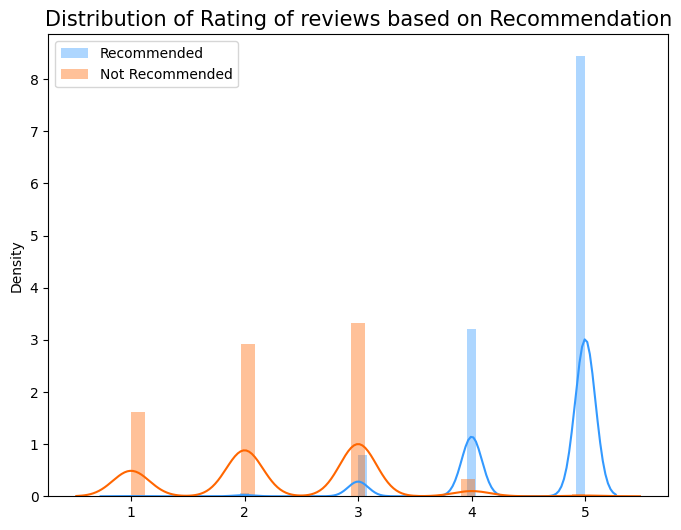

In [ ]:
recommended = df.loc[df['Recommended IND'] == 1, 'Rating']
not_recommended = df.loc[df['Recommended IND'] == 0, 'Rating']

plt.figure(figsize=(8, 6))
sns.distplot(x=recommended, color=colors[1], label='Recommended', )
sns.distplot(x=not_recommended, color=colors[3], label='Not Recommended')
plt.title('Distribution of Rating of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

## Distribution of Review length of reviews based on Recommendation

This code generates a histogram using Seaborn library to compare the distribution of review lengths among recommended and not recommended reviews in a dataset. The plot is then displayed with a title and a legend. Binwidth is set to 8 for both histograms, and kernel density estimation (KDE) is turned on.






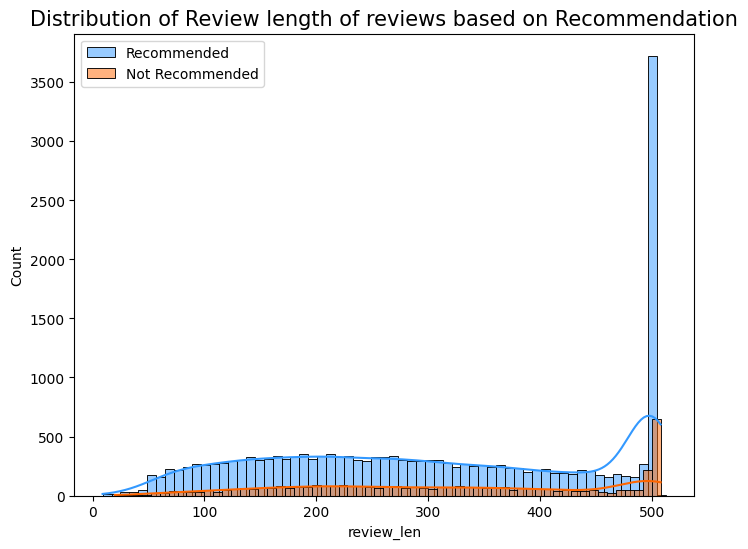

In [ ]:
recommended = df.loc[df['Recommended IND'] == 1, 'review_len']
not_recommended = df.loc[df['Recommended IND'] == 0, 'review_len']

plt.figure(figsize=(8, 6))
sns.histplot(x=recommended, color=colors[1], kde=True, label='Recommended', binwidth=8)
sns.histplot(x=not_recommended, color=colors[3], kde=True, label='Not Recommended', binwidth=8)
plt.title('Distribution of Review length of reviews based on Recommendation', size=15)
plt.legend()
plt.show()

**Recommended reviews tend to be lengthier than those of not recommended reviews.**

## 2D Density jointplot of rating and sentiment polarity

This code generates a 2D kernel density estimation plot using Seaborn library to visualize the joint distribution of rating and sentiment polarity scores in a dataset. The plot is then displayed with a filled contour plot overlaid on top of the kernel density plot with 6 contour levels. The size of the figure is set to 8x8.






<Figure size 800x800 with 0 Axes>

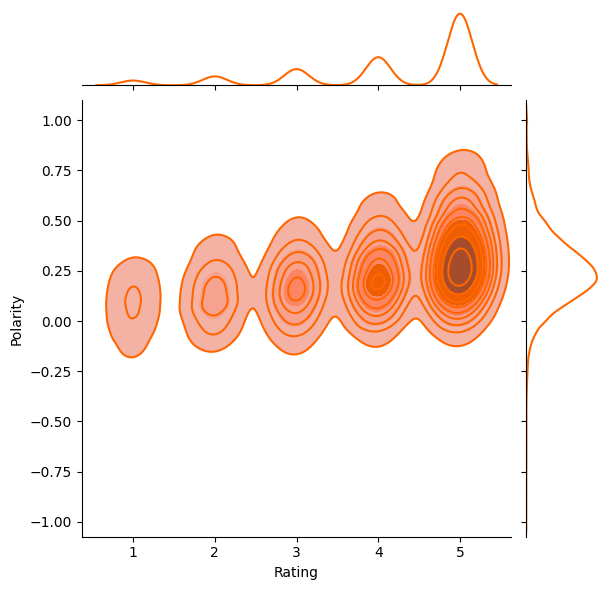

In [ ]:
plt.figure(figsize=(8, 8))
g = sns.jointplot(x='Rating', y='Polarity', kind='kde', color=colors[3], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[3], zorder=0, levels=6)

plt.show()

## 2D Density jointplot of age and sentiment polarity

This code generates a 2D kernel density estimation plot using Seaborn library to visualize the joint distribution of age and sentiment polarity scores in a dataset. The plot is then displayed with a filled contour plot overlaid on top of the kernel density plot with 6 contour levels. The size of the figure is set to 10x8.






<Figure size 1000x800 with 0 Axes>

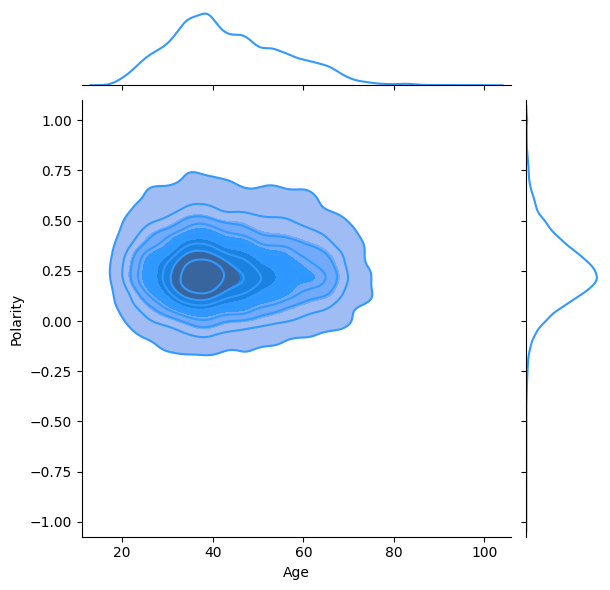

In [ ]:
plt.figure(figsize=(10, 8))
g = sns.jointplot(x='Age', y='Polarity', kind='kde', color=colors[1], data=df)
g.plot_joint(sns.kdeplot, fill=True, color=colors[1], zorder=0, levels=6)
plt.show()

**There were few people are very positive or very negative. People who give neutral to positive reviews are more likely to be in their 30s. Probably people at these age are likely to be more active.**